<a href="https://colab.research.google.com/github/JustSurWHYving/cloud-coverage-detection/blob/main/normal_neural_try_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/aims_ccd/train.csv")

<ipython-input-2-bdb0de5e22e2>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/aims_ccd/train.csv")


In [3]:
df.head(69)

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,01-Jan,01:04,-0.904091,-0.286839,41.70954,7.192,1.087,-7.113,32.95,0.0,4.20,276.5,806.299,0.0,0.265,0.0,0.0
65,01-Jan,01:05,-0.928250,-0.237384,42.24029,7.236,1.115,-6.985,33.22,0.0,4.95,289.7,806.333,0.0,0.123,0.0,0.0
66,01-Jan,01:06,-0.929167,-0.252221,42.76549,7.171,1.157,-6.843,33.78,0.0,5.20,286.8,806.361,0.0,0.092,0.0,0.0
67,01-Jan,01:07,-0.928506,-0.326403,43.28518,7.085,0.979,-7.121,33.17,0.0,4.45,300.6,806.301,0.0,0.280,0.0,0.0


In [4]:
df.drop(columns=['MST' , 'DATE (MM/DD)'],inplace=True)
df.head()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [5]:
import numpy as np

df['sin(Azimuth)'] = np.sin(np.radians(df['Azimuth Angle [degrees]']))
df['cos(Azimuth)'] = np.cos(np.radians(df['Azimuth Angle [degrees]']))

df.drop(columns=['Azimuth Angle [degrees]'], inplace=True)

print(df.head())

   Global CMP22 (vent/cor) [W/m^2]  Direct sNIP [W/m^2]  \
0                        -0.962276             0.000000   
1                        -0.937921             0.000000   
2                        -0.944395             0.000000   
3                        -0.951350            -0.029673   
4                        -0.934976            -0.054401   

   Tower Dry Bulb Temp [deg C]  Tower Wet Bulb Temp [deg C]  \
0                        7.216                        0.988   
1                        7.251                        1.040   
2                        7.256                        1.093   
3                        7.254                        1.060   
4                        7.331                        1.081   

   Tower Dew Point Temp [deg C]  Tower RH [%]  Total Cloud Cover [%]  \
0                        -7.312         32.33                    0.0   
1                        -7.260         32.40                    0.0   
2                        -7.207         32.54     

In [6]:
df=df.iloc[:-30000, :]
df

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),sin(Azimuth),cos(Azimuth)
0,-0.962276,0.000000,7.216,0.988,-7.312,32.33,0.0,9.95,271.30,806.779,0.0,0.219,0.0,0.0,-0.054839,0.998495
1,-0.937921,0.000000,7.251,1.040,-7.260,32.40,0.0,8.20,272.90,806.840,0.0,0.206,0.0,0.0,-0.040916,0.999163
2,-0.944395,0.000000,7.256,1.093,-7.207,32.54,0.0,6.70,288.80,806.876,0.0,0.148,0.0,0.0,-0.026973,0.999636
3,-0.951350,-0.029673,7.254,1.060,-7.440,31.89,0.0,7.70,294.00,806.823,0.0,0.235,0.0,0.0,-0.013017,0.999915
4,-0.934976,-0.054401,7.331,1.081,-7.419,31.78,0.0,7.20,285.50,806.762,0.0,0.182,0.0,0.0,0.000945,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497035,-0.971774,-0.696220,-4.293,-4.311,-4.411,99.00,0.0,1.20,58.17,811.758,0.0,0.864,1.0,0.0,0.999939,-0.011082
497036,-0.979429,-0.720908,-4.301,-4.331,-4.431,98.90,0.0,1.20,65.84,811.726,0.0,0.831,1.0,0.0,0.999904,-0.013840
497037,-0.992569,-0.760409,-4.315,-4.345,-4.445,98.90,0.0,0.95,62.73,811.704,0.0,0.859,1.0,0.0,0.999862,-0.016591
497038,-1.005990,-0.785097,-4.314,-4.332,-4.432,99.00,0.0,0.95,72.58,811.687,0.0,0.879,1.0,0.0,0.999813,-0.019336


In [7]:
import pandas as pd
df_cleaned = df.dropna(subset=['Total Cloud Cover [%]'])

df_ffill = df_cleaned.fillna(method='ffill')

df_imputed = df_ffill.fillna(method='bfill')
remaining_missing_values = df_imputed.isna().sum()
print("Remaining missing values :")
print(remaining_missing_values)

Remaining missing values :
Global CMP22 (vent/cor) [W/m^2]          0
Direct sNIP [W/m^2]                      0
Tower Dry Bulb Temp [deg C]              0
Tower Wet Bulb Temp [deg C]              0
Tower Dew Point Temp [deg C]             0
Tower RH [%]                             0
Total Cloud Cover [%]                    0
Peak Wind Speed @ 6ft [m/s]              0
Avg Wind Direction @ 6ft [deg from N]    0
Station Pressure [mBar]                  0
Precipitation (Accumulated) [mm]         0
Snow Depth [cm]                          0
Moisture                                 0
Albedo (CMP11)                           0
sin(Azimuth)                             0
cos(Azimuth)                             0
dtype: int64


In [8]:
df_imputed.head(69)

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),sin(Azimuth),cos(Azimuth)
0,-0.962276,0.000000,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0,-0.054839,0.998495
1,-0.937921,0.000000,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0,-0.040916,0.999163
2,-0.944395,0.000000,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0,-0.026973,0.999636
3,-0.951350,-0.029673,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0,-0.013017,0.999915
4,-0.934976,-0.054401,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0,0.000945,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,-0.904091,-0.286839,7.192,1.087,-7.113,32.95,0.0,4.20,276.5,806.299,0.0,0.265,0.0,0.0,0.665355,0.746527
65,-0.928250,-0.237384,7.236,1.115,-6.985,33.22,0.0,4.95,289.7,806.333,0.0,0.123,0.0,0.0,0.672241,0.740332
66,-0.929167,-0.252221,7.171,1.157,-6.843,33.78,0.0,5.20,286.8,806.361,0.0,0.092,0.0,0.0,0.678999,0.734139
67,-0.928506,-0.326403,7.085,0.979,-7.121,33.17,0.0,4.45,300.6,806.301,0.0,0.280,0.0,0.0,0.685630,0.727950


In [10]:

import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df_imputed['cloud_cover_15'] = df_imputed['Total Cloud Cover [%]'].shift(-15)
df_imputed['cloud_cover_25'] = df_imputed['Total Cloud Cover [%]'].shift(-25)
df_imputed['cloud_cover_30'] = df_imputed['Total Cloud Cover [%]'].shift(-30)
df_imputed.dropna(inplace=True)

X = df_imputed.drop(columns=['Total Cloud Cover [%]', 'cloud_cover_15', 'cloud_cover_25', 'cloud_cover_30'])
y = df_imputed[['cloud_cover_15', 'cloud_cover_25', 'cloud_cover_30']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='linear'),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.R2Score()
              ])

model.fit(X_train, y_train, epochs=15, validation_split=0.2)

loss, mae, mape , r2_score= model.evaluate(X_test, y_test)
print(f'Loss: {loss}, MAE: {mae}, MAPE: {mape} , R2_SCORE : {r2_score}')

predictions = model.predict(X_test)

for i in range(5):
    print(f'Predicted: {predictions[i]}, Actual: {y_test.iloc[i].values}')


Epoch 1/15
9594/9594 [==============================] - 69s 6ms/step - loss: 193.9414 - mean_absolute_error: 7.0684 - mean_absolute_percentage_error: 529677120.0000 - r2_score: 0.8390 - val_loss: 149.2217 - val_mean_absolute_error: 6.0609 - val_mean_absolute_percentage_error: 529762464.0000 - val_r2_score: 0.8761
Epoch 2/15
9594/9594 [==============================] - 60s 6ms/step - loss: 135.1945 - mean_absolute_error: 5.7879 - mean_absolute_percentage_error: 438495296.0000 - r2_score: 0.8878 - val_loss: 117.7395 - val_mean_absolute_error: 5.2046 - val_mean_absolute_percentage_error: 403652000.0000 - val_r2_score: 0.9023
Epoch 3/15
9594/9594 [==============================] - 60s 6ms/step - loss: 112.7642 - mean_absolute_error: 5.1910 - mean_absolute_percentage_error: 396819712.0000 - r2_score: 0.9064 - val_loss: 102.2968 - val_mean_absolute_error: 4.8420 - val_mean_absolute_percentage_error: 347351616.0000 - val_r2_score: 0.9151
Epoch 4/15
9594/9594 [==============================] -

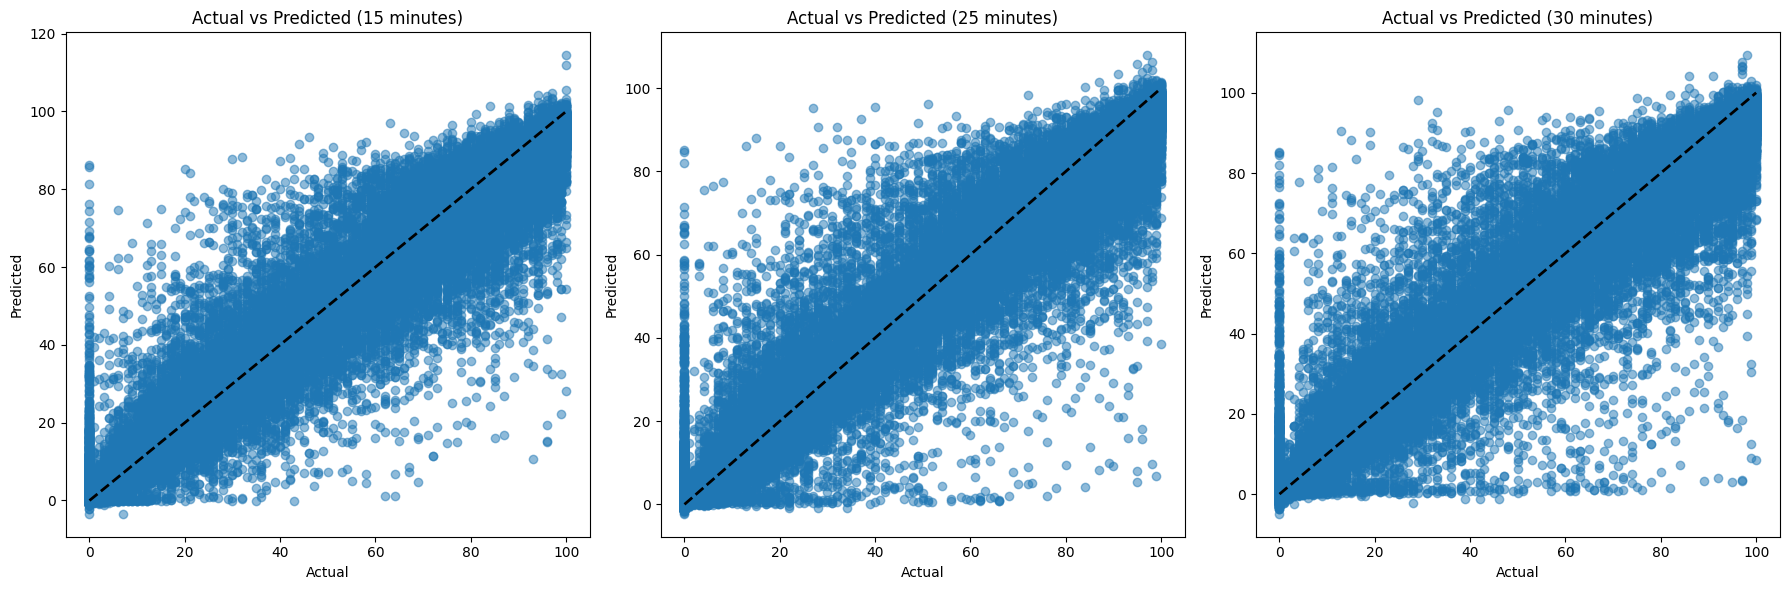

In [15]:
import matplotlib.pyplot as plt

time_horizons = ['15 minutes', '25 minutes', '30 minutes']
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, ax in enumerate(axes):
    ax.scatter(y_test.iloc[:, i], predictions[:, i], alpha=0.5)
    ax.plot([y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
            [y_test.iloc[:, i].min(), y_test.iloc[:, i].max()],
            'k--', lw=2)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    ax.set_title(f'Actual vs Predicted ({time_horizons[i]})')

plt.tight_layout()
plt.show()

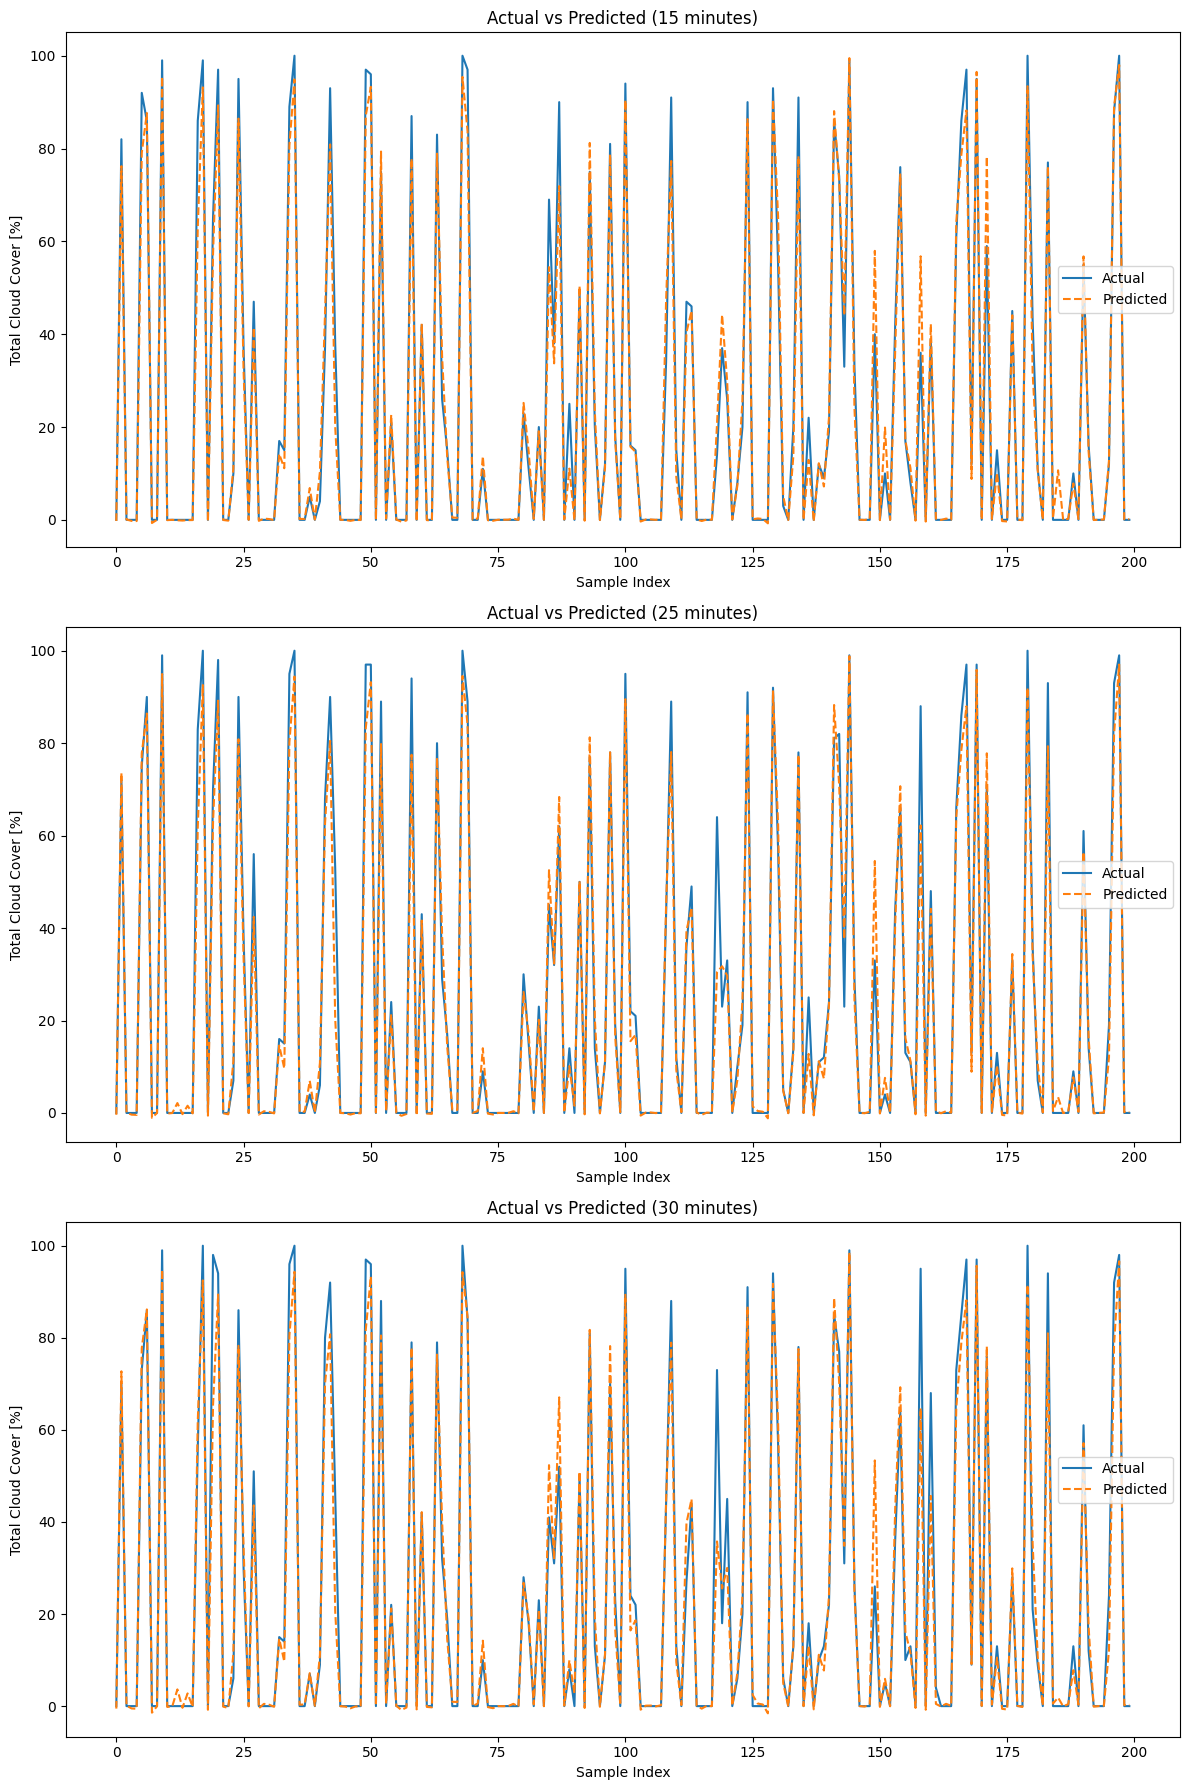

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))
sample_size = 200
for i, ax in enumerate(axes):
    ax.plot(y_test.iloc[:sample_size, i].values, label='Actual', linestyle='-')
    ax.plot(predictions[:sample_size, i], label='Predicted', linestyle='--')
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('Total Cloud Cover [%]')
    ax.set_title(f'Actual vs Predicted ({time_horizons[i]})')
    ax.legend()

plt.tight_layout()
plt.show()

In [13]:
x=0
while(1==1):
  x+=0

KeyboardInterrupt: 